<a href="https://colab.research.google.com/github/Karthikard/ML/blob/main/26_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()


In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digits.data.shape

(1797, 64)

In [10]:
#To visualize converting into 2 dimensoional from 1 dimensional array
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

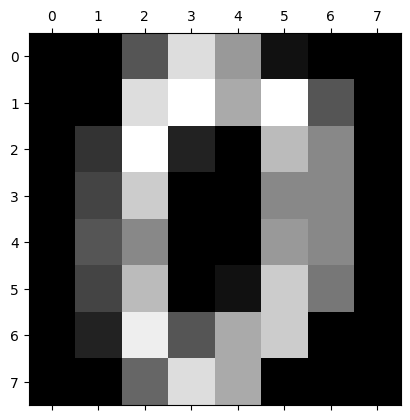

In [12]:
from matplotlib import pyplot as plt
plt.matshow(digits.data[0].reshape(8,8))
plt.gray()
plt.show()

In [13]:
import numpy as np
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
import pandas as pd
df=pd.DataFrame(digits.data , columns=digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [17]:
x=df
y=digits.target

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=30)

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9722222222222222

PCA

In [21]:
from sklearn.decomposition import PCA
pca=PCA(0.95)   #retain 95% of usefull feature
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 29)

Earlier it has 64 col not 29

In [23]:
x_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [32]:
pca.explained_variance_ratio_
#which tells 1st col capturing 14% of usefull info , 2nd col 13% , 3rd 11%......

array([0.14890594, 0.13618771])

In [28]:
X_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train_pca)
model.score(x_test_pca,y_test_pca)

0.9694444444444444

In [30]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [31]:
x_pca

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

In [33]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [34]:
X_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [35]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_pca,y_train_pca)
model1.score(x_test_pca,y_test_pca)

0.6083333333333333

Accuracy reduced to 60 % failure model when feature is 2 , but the computation cose reduced.